In [3]:
"""
INPUT:   G a directed/oriented graph with vertices labeled 0,...,(n-1)
OUTPUT:  a zero forcing set & throttling number
"""
def throttle(G):
    n = G.order()
    nbrs = []  # Find lists of out neighbors (for push_zeros)
    for v in range(n):
        out_nbrs = []
        for e in G.outgoing_edges(v):
            if e[0]==v:
                out_nbrs.append(e[1])
            else:
                out_nbrs.append(e[0])
        nbrs.append(out_nbrs)
    found_Z = False  # a flag used for knowing when to stop outer loop
    throt_num = n
    zfs = [x for x in range(n)]
    
    for b in range(1,n):
        for S in Combinations(range(n), b):
            Q = push_zeros(nbrs, S, n)
            if len(Q[0]) == n:  # all blue?
                if b + Q[1] < throt_num:
                    zfs = S
                    throt_num = b + Q[1]
                    
        if throt_num < b + 1:
            return zfs, throt_num
        
    return zfs, throt_num

"""
Source: https://sage.math.iastate.edu/home/pub/74/
INPUT:   nbrs = a list of all out-neighbors of each vertex
         S = an initial set of "blue" vertices
OUTPUT:  the set of all vertices forced under repeated
         iteration of the color change rule
"""
def push_zeros(nbrs,S,n):
    active = set(S)  # blue vertices that might be able to force
    filled = set(S)  # blue vertices
    unfilled = set(range(n)).difference(filled)  # white vertices
    force = True
    count = -1  # count keeps track of zero forcing rounds
    while force:  # keep going until no more forces happen
        count += 1  # increase count
        force = False
        new_active = copy(active)  # copy to be careful with prop time
        for v in active:  # check each blue vertex which might force
            white_nbrs = set(nbrs[v]).intersection(unfilled)  # find white neighbors
            if len(white_nbrs) == 0:  # if no white neighbors, will never force
                new_active.remove(v)  # remove from active
            elif len(white_nbrs) == 1:  #one white neighbor so can force
                force = True
                w = white_nbrs.pop()  # the white neighbor that we force
                filled.add(w)  # w is now blue
                unfilled.remove(w)  # so it's not white
                new_active.add(w)  # w might now be able to force
                new_active.remove(v)  # but v will never force again
        active = copy(new_active)  # update what can be forcing
    return filled, count  # return what was changed blue, and how many rounds 

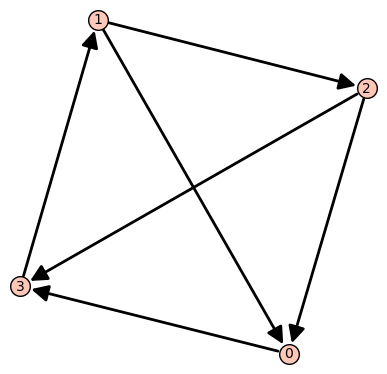

In [6]:
G=DiGraph(4)
G.add_edges([(1,0),(3,1),(0,3),(2,0),(2,3),(1,2),(0,3)])
G.show()

In [7]:
throttle(G)

([0, 1], 3)